In [11]:
import numpy as np
import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
from scipy.stats import norm
import math
import statistics
from scipy.optimize import fsolve
##plt.rcParams['text.usetex'] = False
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['font.family'] = 'serif'
from gaussian_functions import *

In [12]:
#####################
##FIND M DARK MATTER HALO VALUE FROM M STELLAR

#ELVES. IV. The Satellite Stellar-to-halo Mass Relation Beyond the Milky Way
# Values and equation from Shany's paper - section 4.2, eq 1

## Equation from Shany's paper
def logMstellar_eq(logMhalo):
    M1 = 11.889
    alpha = 2.1
    beta = 0.464
    epsilon = -1.432
    loggamma = -0.812
    gamma = 10**loggamma
    delta = 0.319
    x = np.log10(10**logMhalo/10**M1)
    logMstellar = epsilon + M1 - np.log10(10**(-alpha*x) + 10**(-beta*x)) + gamma*np.exp(-0.5*(x/delta)**2)
    return logMstellar

## Solve for Mhalo value for given Mstellar value (solve y(x) eq for x value)
def logMhalo_eq (logMstellar):
    func = lambda x: logMstellar_eq(x) - logMstellar  ## def f(x) = 0
    logMhalo_guess = 12
    logMhalo = fsolve(func, logMhalo_guess) ##returns roots of func
    return(logMhalo)


### STNDARD DEVIATION
def std_eq (logMhalo):
    sigma0 = 0.02
    nu = -0.47
    M1 = 11.889
    logsigma = sigma0 + nu * (logMhalo - M1)
    return (logsigma)

In [13]:
Mstellar = 1.72*10**8
logMstellar = np.log10(Mstellar)
Mhalo = logMhalo_eq (logMstellar)
print(Mhalo)

[10.83470542]


[11.20296399]


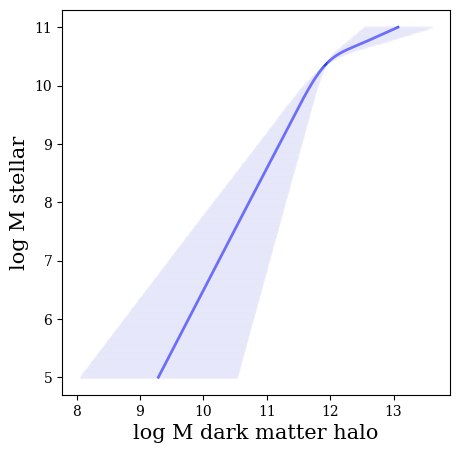

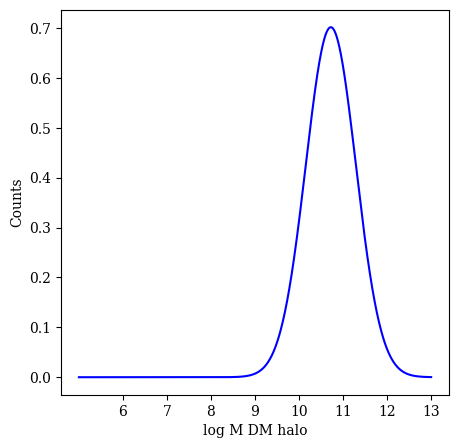

In [14]:
################################################
## DARK MATTER HALO MASS
################################################

logMstellar = 9
logMhalo = logMhalo_eq(logMstellar)
print(logMhalo)


########### DISTRIBUTION #########################
Mstellar = np.logspace(5, 11, 500, base=10)
logMstellar = np.log10(Mstellar)
mean_Mhalos = [] ## M halos for these stellar values
logsigmas = []  ## standard deviations for these M halo values

for i in range (len(logMstellar)):
    logMhalo = logMhalo_eq(logMstellar[i])
    mean_Mhalos.extend (logMhalo) ## gives value of mean halos (not log)
    logsigmas.extend(abs(std_eq(logMhalo)))
    
plt.figure(figsize=(5,5))
plt.plot(mean_Mhalos, logMstellar)
plt.errorbar(mean_Mhalos, logMstellar, xerr = logsigmas, color = 'blue', linewidth = 2, ecolor='lavender', alpha = 0.5)
plt.xlabel('log M dark matter halo', size = 15)
plt.ylabel('log M stellar', size = 15)
plt.xticks(np.linspace(8, 13, 6))
plt.show()



##########PLOT GAUSSIAN FOR GIVEN M STELLAR #######################

logMstellar = 8
plt.figure(figsize=(5,5))
mu = logMhalo_eq(logMstellar)  ##log
sigma = std_eq(mu)  ##log

Mhalos = np.linspace(5, 13, 1000) # Generate x values
gaus = Gaussian(Mhalos, mu, sigma)  # Generate y values

# Plot the Gaussian function
plt.plot(Mhalos, gaus, 'b')
plt.xlabel('log M DM halo')
plt.ylabel('Counts')
plt.xticks(np.linspace(6, 13, 8))
plt.show()



# Sample DM halo mass

In [15]:
def DM_random_sample (logMstellar, n):
    mu = logMhalo_eq(logMstellar)  ##log
    sigma = std_eq(mu)  ##log
    sample_masses = np.random.normal(mu, sigma, n)
    return (sample_masses) 

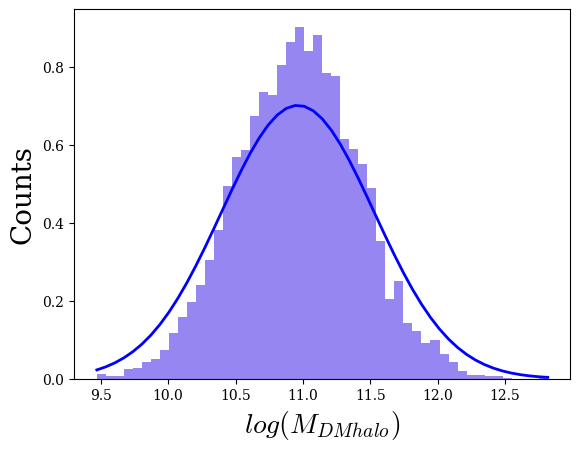

In [16]:
logMstellar = 8.5
n = 5000
sample = DM_random_sample (logMstellar, n)
count, bins, ignoored = plt.hist(sample, 50, 
                                 density=True, color = 'mediumslateblue', alpha=0.8)

muDM = logMhalo_eq(logMstellar)  ##log
sigmaDM = std_eq(mu)  ##log
plt.plot(bins, Gaussian(bins, muDM, sigmaDM), linewidth=2, color='b')
plt.xlabel('$log(M_{{DMhalo}})$', fontsize = 20)
plt.ylabel('Counts', fontsize = 20)
plt.show()

# rho_0 and r_0

In [30]:
#So rho_0 and r_0 are going to depend on the mass and concentration of the halo, denoted by c
#get concentrations from mass is Diemer & Joyce 2019
#https://iopscience.iop.org/article/10.3847/1538-4357/aafad6
#The relevant figure is the top middle panel of figure 3. 
#Since we run the simulation for 10 Gyr, this corresponds to redshift approximately 2, so we should be looking at the orange curve

#get concentrations as a function of halo mass. as an input, 
#you should use the halo mass in units of solar masses

# a fitting function to Diemer & Joyce 2019 z = 2 c(M):
#it’s a “piecewise-power-law fit to the concentration-mass relation at z = 2 from Diemer & Joyce (2019)”

def c_func(M_halo): #in solar masses
    c_values = np.array([5.606078101846313, 5.505601101255639, 5.296315905448495, 
                         5.094986297483347, 4.901309860470804, 4.666519328282937, 
                         4.500743526125894, 4.329656123893253, 4.154325163981534, 
                         3.975808982640419, 3.834570325527022, 3.727126007769686, 
                         3.6040211391832533, 3.512099050898484, 3.4225214744765236, 
                         3.4402523213171285])
    scaled_M_values = np.array([1208795796.6963477, 1628413544.0132532, 
                                2799360456.643171, 5080218046.9130125, 
                                8973072494.285637, 18147780986.393196, 
                                31197345819.126064, 52197182204.356415, 
                                97327438615.81503, 191581222925.96384, 
                                347677407476.5763, 566162599282.2716, 
                                1114445470753.5625, 2193696137571.7903, 
                                5976825664072.4, 14221361511653.348])
    scaled_M = M_halo/0.7
    return 10**np.interp(np.log10(scaled_M), np.log10(scaled_M_values), np.log10(c_values))


# NFW halo - eqs (3) and (4)
# Mstellar = 1.72*10**8
# logMstellar = np.log10(Mstellar)
# M_halo = 10**logMhalo_eq(logMstellar)
# print(M_halo)
# M_halo = 106210089323.59808 
# M_halo = 10**10.34446449

def rho_0_func (M_halo):#in solar masses 
    rho_crit = 0.00136 
    # c = c_func(M_halo)
    c = 5
    rho_0 = 200/3 * c**3 * rho_crit / (np.log(1+c) - c/(1+c))
    return (rho_0)

def r_0_func (M_halo):  #in solar masses 
    M_halo = M_halo*10**(-5)
    rho_crit = 0.00136
    # c = c_func(M_halo)
    c  = 5
    r_0 = 1/c * (3*M_halo/ (800 * math.pi * rho_crit))**(1/3)
    return (r_0)

M_halo = 793832714.3215209
print('rho ', rho_0_func (M_halo))
print('r ', r_0_func (M_halo))

rho  11.824941859242292
r  3.819916080638331


## Debugging